# Quantum Computing - Simulation of Qubits

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector

## Conventions
A zero-qubit vector $|0⟩$ is with x and y components of the form $\begin{pmatrix} 1\\0 \end{pmatrix}$

A one-qubit vector $|1⟩$ is with x and y components of the form $\begin{pmatrix} 0\\1 \end{pmatrix}$

In [12]:
zero_qubit=np.matrix('1; 0')
one_qubit=np.matrix('0; 1')

In [18]:
#Function to initialize a qubit with specified percentage of the basis |0> and |1>
def zero_one_qubit(percentage_zero,percentage_one):
     if not percentage_zero+percentage_one==100 \
        or percentage_zero<0 \
        or percentage_one<0: \
            raise Exception("percentages must add up to 100\% and both be positive ")
     #Return the qubit       
     return np.sqrt(percentage_zero/100.)*zero_qubit+np.sqrt(percentage_one/100.)*one_qubit

#Function to initialize a qubit with specified percentage of the any basis pair of choice
def qubit(percentage_first,percentage_second,basis_first,basis_second):
    if not percentage_first+percentage_second==100 \
        or percentage_first<0 \
        or percentage_second<0: \
            raise Exception("percentages must add up to 100\% and both be positive ")
    #Return the qubit       
    return sqrt(percentage_first/100.)*basis_first+sqrt(percentage_second/100.)*basis_second

In QC, the state vectors point to a specific point in space - corresponds to a particular quantum state. We visualize this using a Bloch sphere. 

Balanced qubit [[0.70710678]
 [0.70710678]]
Unbalanced qubit [[0.31622777]
 [0.9486833 ]]


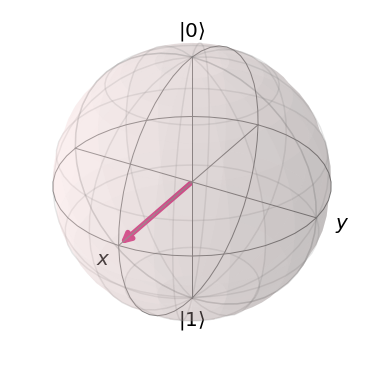

In [19]:
balanced_qubit=zero_one_qubit(50,50)
unbalanced_qubit=zero_one_qubit(10,90)
print("Balanced qubit",balanced_qubit)
print("Unbalanced qubit",unbalanced_qubit)
plot_bloch_vector([1, 0, 0])

## Two Different Representations of Qubits
### A
A +qubit vector $|+⟩$ is with x and y components of the form $\begin{pmatrix} \frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}} \end{pmatrix}$

A -qubit vector $|-⟩$ is with x and y components of the form $\begin{pmatrix} \frac{1}{\sqrt{2}}\\-\frac{1}{\sqrt{2}} \end{pmatrix}$

### B
A clockwisearrow_qubit vector $|↻⟩$ is with x and y components of the form $\begin{pmatrix} \frac{1}{\sqrt{2}}\\\frac{i}{\sqrt{2}} \end{pmatrix}$

A counterclockwisearrow_qubit vector $|↺⟩$ is with x and y components of the form $\begin{pmatrix} \frac{1}{\sqrt{2}}\\-\frac{i}{\sqrt{2}} \end{pmatrix}$

In [20]:
plus_qubit=1/np.sqrt(2)*np.matrix('1; 1')
minus_qubit=1/np.sqrt(2)*np.matrix('1; -1')
print(plus_qubit)
print(minus_qubit)

[[0.70710678]
 [0.70710678]]
[[ 0.70710678]
 [-0.70710678]]


In [22]:
clockwisearrow_qubit=1/np.sqrt(2)*np.matrix([[1],[np.complex(0,1)]])    
counterclockwisearrow_qubit=1/np.sqrt(2)*np.matrix([[1],[-np.complex(0,1)]])
print(clockwisearrow_qubit)
print(counterclockwisearrow_qubit)

[[0.70710678+0.j        ]
 [0.        +0.70710678j]]
[[0.70710678+0.j        ]
 [0.        -0.70710678j]]


# The Bloch Sphere

In [23]:
def get_bloch_coordinates(qubit):
    def get_x_bloch(qubit):
        qubit_x_basis=1./np.sqrt(2)*np.matrix('1 1; 1 -1')*qubit 
        prob_zero_qubit=(qubit_x_basis.item(0)*qubit_x_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_x_basis.item(1)*qubit_x_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit
        
    def get_y_bloch(qubit):
        qubit_y_basis=1./np.sqrt(2)*np.matrix('1 1; 1 -1')*np.matrix([[1,0],[0,-np.complex(0,1)]])*qubit
        prob_zero_qubit=(qubit_y_basis.item(0)*qubit_y_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_y_basis.item(1)*qubit_y_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit
    
    def get_z_bloch(qubit):
        qubit_z_basis=qubit
        prob_zero_qubit=(qubit_z_basis.item(0)*qubit_z_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_z_basis.item(1)*qubit_z_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit
    return (get_x_bloch(qubit),get_y_bloch(qubit),get_z_bloch(qubit))

|0> coordinates are: (0.0, 0.0, 1)
|1> coordinates are: (0.0, 0.0, -1)


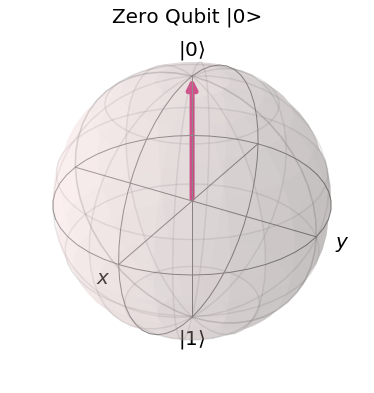

In [43]:
print('|0> coordinates are:',get_bloch_coordinates(zero_qubit))
print('|1> coordinates are:',get_bloch_coordinates(one_qubit))

plot_bloch_vector(get_bloch_coordinates(zero_qubit),title='Zero Qubit |0>')

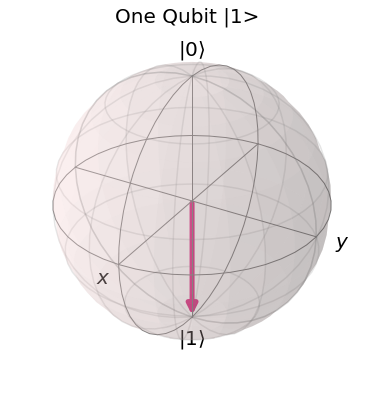

In [44]:
plot_bloch_vector(get_bloch_coordinates(one_qubit),title='One Qubit |1>')

|"+"> coordinates are: (0.9999999999999996, 0.0, 0.0)
|"-"> coordinates are: (-0.9999999999999996, 0.0, 0.0)


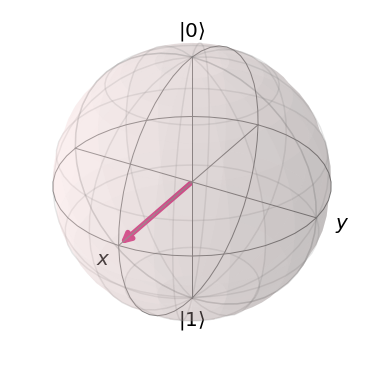

In [45]:
print('|"+"> coordinates are:',get_bloch_coordinates(plus_qubit))
print('|"-"> coordinates are:',get_bloch_coordinates(minus_qubit))
plot_bloch_vector(get_bloch_coordinates(plus_qubit))

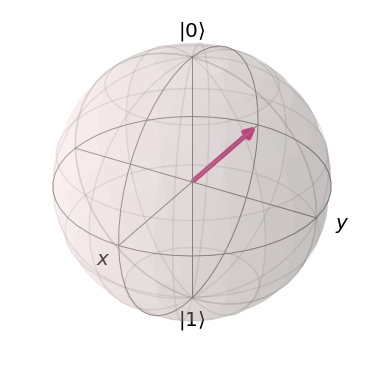

In [46]:
plot_bloch_vector(get_bloch_coordinates(minus_qubit))

|"↻"> coordinates are: (0.0, 0.9999999999999996, 0.0)
|"↺"> coordinates are: (0.0, -0.9999999999999996, 0.0)


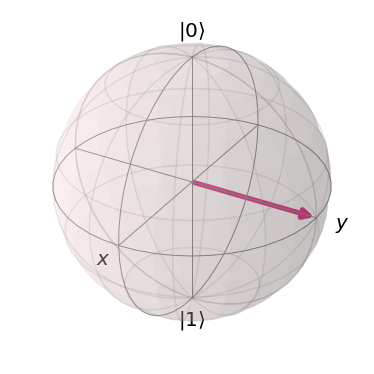

In [47]:
print('|"↻"> coordinates are:',get_bloch_coordinates(clockwisearrow_qubit))
print('|"↺"> coordinates are:',get_bloch_coordinates(counterclockwisearrow_qubit))
plot_bloch_vector(get_bloch_coordinates(clockwisearrow_qubit))

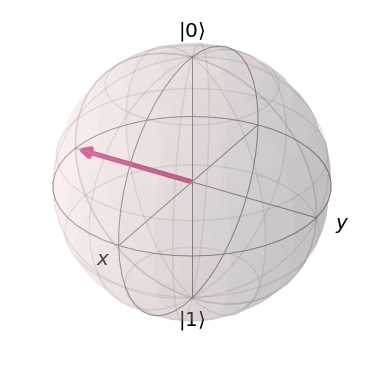

In [48]:
plot_bloch_vector(get_bloch_coordinates(counterclockwisearrow_qubit))

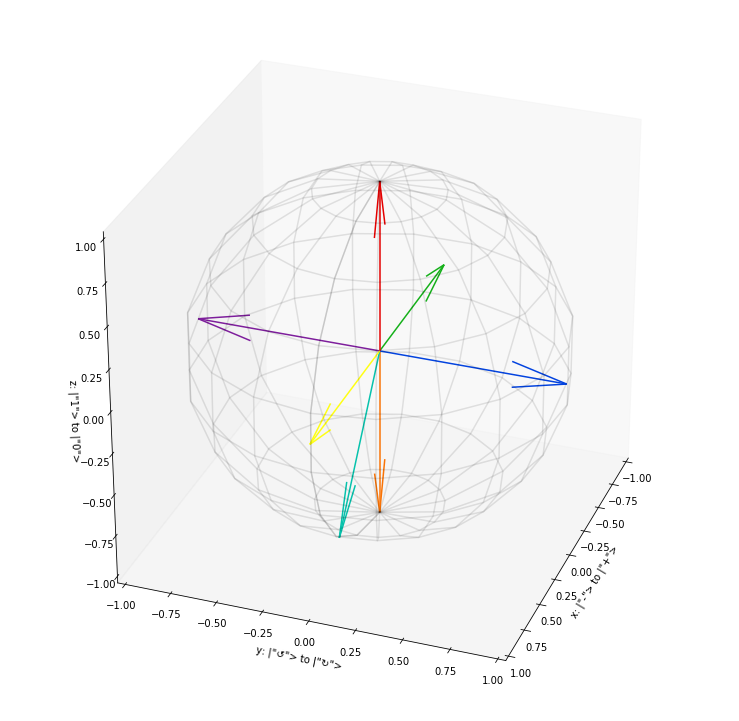

In [51]:
def plot_bloch(qubit,color='b',ax=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    if not ax:
        fig = plt.figure(figsize=(13,13))
        ax = fig.add_subplot(111, projection='3d')
        
        # draw sphere
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        ax.plot_wireframe(x, y, z, color="k",alpha=.1)
        ax.grid(False)

    coordinates=get_bloch_coordinates(qubit)
    ax.quiver([0],[0],[0],[coordinates[0]],[coordinates[1]],[coordinates[2]],length=1,color=color,arrow_length_ratio=0.3)
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_xlabel('x: |"-"> to |"+">')
    ax.set_ylabel('y: |"↺"> to |"↻">')
    ax.set_zlabel('z: |"1"> to |"0">')
    ax.view_init(azim=20)
    return ax

# Plotting all of our basis qubits, colors and orientation match the textbook figure
ax=plot_bloch(zero_qubit,color='xkcd:red')
plot_bloch(one_qubit,color='xkcd:orange',ax=ax)
plot_bloch(plus_qubit,color='xkcd:yellow',ax=ax)
plot_bloch(minus_qubit,color='xkcd:green',ax=ax)
plot_bloch(clockwisearrow_qubit,color='xkcd:blue',ax=ax)
plot_bloch(counterclockwisearrow_qubit,color='xkcd:purple',ax=ax)

# Now plotting a qubit that is 10% |"0"> and 90% |"1"> in turquoise
plot_bloch(zero_to_one_qubit(10,90),color="xkcd:turquoise",ax=ax)



# Measuring a qubit on the Bloch Sphere

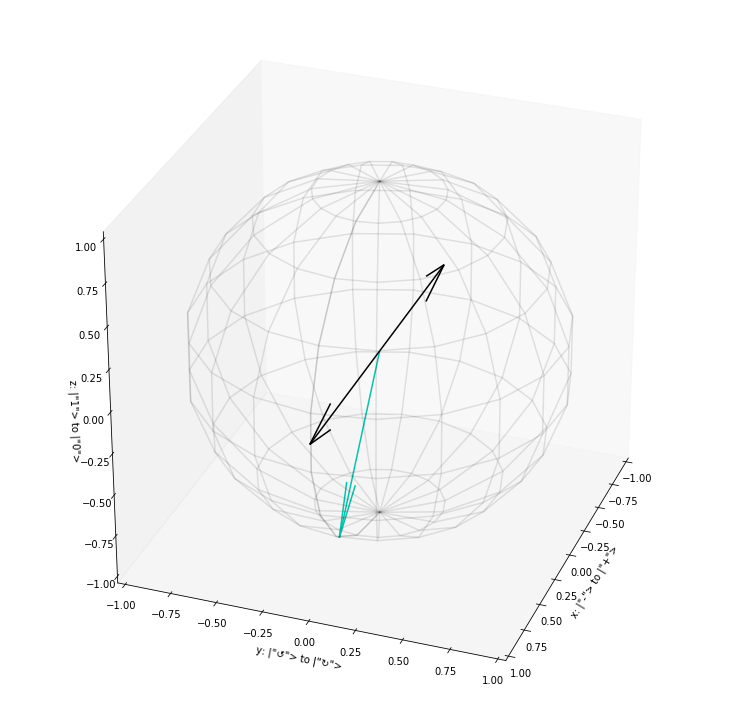

In [52]:
ax=plot_bloch(plus_qubit,color='xkcd:black')
plot_bloch(minus_qubit,color='xkcd:black',ax=ax)
plot_bloch(ten_ninety_qubit,color="xkcd:turquoise",ax=ax)